In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import cv2

from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [2]:
import tensorflow as tf

from keras.models import Sequential

from keras.layers import Dense,MaxPool2D,Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization

from keras.optimizers import Adam,SGD

from keras import regularizers

In [3]:
vehicle=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vehcicle_safety/vehicle_safety.csv")

vehicle

,Filename,Labels
0,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
1,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
2,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
3,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
4,/content/drive/MyDrive/Colab Notebooks/vehcicl...,ins
...,...,...
2116,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2117,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2118,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out
2119,/content/drive/MyDrive/Colab Notebooks/vehcicl...,out


In [4]:
print(vehicle.shape)

(2121, 2)


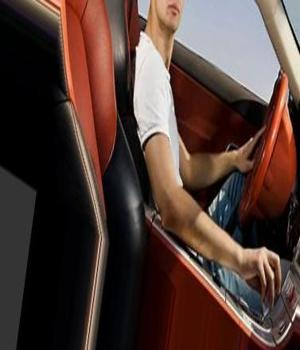

In [5]:
#example for display an image

img=cv2.imread(vehicle.Filename[1])

cv2_imshow(img)


In [6]:
img.shape

(350, 300, 3)

In [7]:
img_size=img.shape

x=[]

y=[]

for img,target in zip(vehicle.Filename,vehicle.Labels):
  x.append(cv2.imread(img))
  y.append(target)

In [8]:
encoder=LabelEncoder()

y_encoded=encoder.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
# from sklearn.model_selection import StratifiedKFold
# kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.25,stratify=y,shuffle=True)

In [10]:
x_train=np.array(x_train) / 255

x_test=np.array(x_test) / 255


#convert to 4D
x_train=x_train.reshape(-1,img_size[0],img_size[1],img_size[2])   # -1 implies x_train size ,i.e space holder
y_train=np.array(y_train)

x_test=x_test.reshape(-1,img_size[0],img_size[1],img_size[2])   # -1 implies x_test size
y_test=np.array(y_test)

In [11]:
x_train.shape,x_test.shape

((1590, 350, 300, 3), (531, 350, 300, 3))

In [12]:
# AlexNet
model=Sequential()

#Convolutianal layer 1
model.add(Conv2D(filters=128,kernel_size=(11,11),strides=(4,4),activation="relu",input_shape=(img_size[0],img_size[1],img_size[2])))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#convolutianal layer 2
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

#Convolutional layer 3
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation="relu",padding="same"))
model.add(BatchNormalization())

#convolutional layer 4
model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation="relu",padding="same"))
model.add(BatchNormalization())

#convolutional layer 5
model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

#fully connected layer 1 (Fcl)
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))

#fcl 2
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))

#fcl 3
model.add(Dense(1,activation="sigmoid"))

In [13]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 85, 73, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 85, 73, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 36, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 36, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 42, 36, 256)      1024      
 hNormalization)                                                 
                                                        

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [16]:
trained=model.fit(x_train, y_train, batch_size=50, epochs=15, callbacks=callback,
                             validation_data=(x_test, y_test))

trained

Epoch 1/15
32/32 [==============================] - 23s 348ms/step - loss: 1.0164 - accuracy: 0.6044 - val_loss: 0.6989 - val_accuracy: 0.4670
Epoch 2/15
32/32 [==============================] - 4s 129ms/step - loss: 0.6545 - accuracy: 0.7050 - val_loss: 0.6748 - val_accuracy: 0.5480
Epoch 3/15
32/32 [==============================] - 4s 116ms/step - loss: 0.5889 - accuracy: 0.7113 - val_loss: 0.6594 - val_accuracy: 0.5782
Epoch 4/15
32/32 [==============================] - 4s 116ms/step - loss: 0.5009 - accuracy: 0.7642 - val_loss: 0.6251 - val_accuracy: 0.6309
Epoch 5/15
32/32 [==============================] - 4s 123ms/step - loss: 0.3845 - accuracy: 0.8195 - val_loss: 0.5651 - val_accuracy: 0.7062
Epoch 6/15
32/32 [==============================] - 4s 126ms/step - loss: 0.3488 - accuracy: 0.8522 - val_loss: 0.5008 - val_accuracy: 0.7646
Epoch 7/15
32/32 [==============================] - 4s 118ms/step - loss: 0.3373 - accuracy: 0.8491 - val_loss: 0.4911 - val_accuracy: 0.7514
Epoch

In [17]:
hist=trained.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

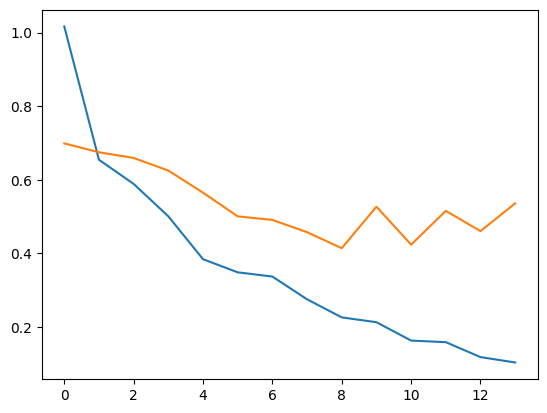

In [18]:
plt.plot(hist["loss"],label="training_loss")
plt.plot(hist["val_loss"],label="validation loss")

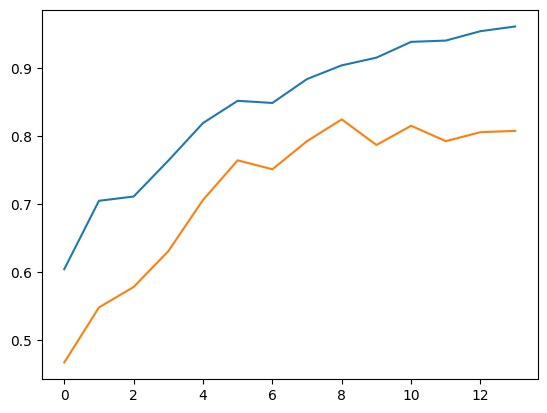

In [19]:
plt.plot(hist["accuracy"],label="training_accuracy")
plt.plot(hist["val_accuracy"],label="validation accuracy")

In [20]:
classes=["inside the window","outside the window"]

In [21]:
def predi(index):
  pred_index=np.argmax(model.predict(x_test[index].reshape(1,350,300,3)))
  pred_labe=classes[pred_index]
  plt.matshow(x_test[index].reshape(350,300,3))
  print("predicted label:",pred_labe)
  print("true label:",classes[int(y_test[index])])


1/1 [==============================] - 0s 22ms/step
predicted label: inside the window
true label: inside the window


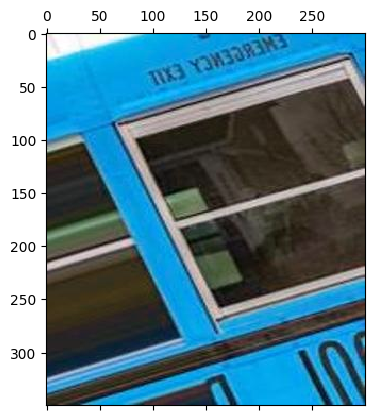

In [23]:
predi(87)